In [2]:
import numpy as np
# odd 函数前的系数

# Define random r
r = np.random.randint(1, 10)
r = 2

# Define x_mu
x_mu = np.array([(2 * mu - 1) / (2 * r) * np.pi for mu in range(1, r + 1)])

p0 = np.array([mu for mu in range(1, r + 1)])

# Create matrix A
A = np.array([[np.sin(n * x) for n in range(1, r + 1)] for x in x_mu])

# Calculate the inverse of A and the dot product with p0
b = np.dot(np.linalg.inv(A).T, p0)

# Calculate the expression for each x_mu
expression_values = np.array([np.sin(r * x) / (2 * r * np.sin(0.5 * x)**2) for x in x_mu])

# Check if the values are equal
are_equal = np.allclose(b , expression_values)
b, expression_values, are_equal



(array([ 1.70710678, -0.29289322]), array([ 1.70710678, -0.29289322]), True)

In [3]:
import numpy as np

# Define random r
r = np.random.randint(1, 10)
r = 2

# Define x_mu
x_mu = np.array([(2 * mu - 1) / (2 * r) * np.pi for mu in range(1, r + 1)])

p0 = np.array([mu for mu in range(1, r + 1)])

# Create matrix A
A = np.array([[np.sin(n * x) for n in range(1, r + 1)] for x in x_mu])

# Calculate the inverse of A and the dot product with p0
b = np.dot(np.linalg.inv(A).T, p0)
b = np.hstack((0.5 * b, -0.5 * b))

# Sort b in ascending order
b_sorted = np.sort(b)

# Generate x_mu_long
x_mu_long = np.array([(2 * mu - 1) / (2 * r) * np.pi for mu in range(1, 2*r + 1)])

# Calculate the expression for each x_mu
expression_values = np.array([np.sin(r * x) / (4 * r * np.sin(0.5 * x)**2) for x in x_mu_long])

# Sort expression_values in ascending order
expression_values_sorted = np.sort(expression_values)

# Check if the sorted values are equal
are_equal = np.allclose(b_sorted, expression_values_sorted)

b, expression_values, are_equal

(array([ 0.85355339, -0.14644661, -0.85355339,  0.14644661]),
 array([ 0.85355339, -0.14644661,  0.14644661, -0.85355339]),
 True)

In [60]:
import numpy as np

# Define random r
# r = np.random.randint(1, 10)
r = 2

# Define x_mu
x_mu = np.array([(2 * mu - 1) / (2 * r) * np.pi for mu in range(1, r + 1)])

p0 = np.array([mu for mu in range(1, r + 1)])

# Create matrix A
A = np.array([[np.sin(n * x) for n in range(1, r + 1)] for x in x_mu])

# Calculate the inverse of A and the dot product with p0
dot_product_result = np.dot(np.linalg.inv(A).T, p0)
print(0.5*np.sum(dot_product_result**2))
print((2*r**2+1)/6)

# Calculate the expression for each x_mu
expression_values = np.array([np.sin(r * x) / (2 * r * np.sin(0.5 * x)**2) for x in x_mu])

# Check if the values are equal
are_equal = np.allclose(dot_product_result, expression_values)
dot_product_result, expression_values, are_equal


# # Calculate A^T A
A_T_A = A.T @ A
A_T_A

# A_A_T= A @ A.T
# A_A_T

1.5
1.5


array([[1., 0.],
       [0., 2.]])

In [61]:
import numpy as np
from scipy.optimize import minimize, differential_evolution, basinhopping, shgo

# Define r
r = 2

# Initialize p0
d = 3
p0 = np.array([mu**d for mu in range(1, r + 1)])

# Define the function to calculate var based on x_mu
def calculate_var(x_mu, reg_param=1e-5):
    # Create matrix A based on x_mu
    A = np.array([[np.sin(n * x) for n in range(1, r + 1)] for x in x_mu])
    
    # Add a small regularization term to the diagonal of A
    A += reg_param * np.eye(r)
    
    # Calculate the inverse of A and the dot product with p0
    try:
        dot_product_result = np.dot(np.linalg.inv(A).T, p0)
        var = 0.5 * np.sum(dot_product_result**2)
    except np.linalg.LinAlgError:
        # In case A is singular, return a large number
        var = np.inf
    return var

# Define the bounds for x_mu (0 to 2π for each element)
bounds = [(0, np.pi) for _ in range(r)]

# Initial guess for x_mu (equally spaced points between 0 and 2π)
x_mu_initial = np.random.uniform(0, 2 * np.pi, r)

# Differential Evolution
result_de = differential_evolution(calculate_var, bounds)
optimal_x_mu_de = result_de.x
optimal_var_de = result_de.fun

A = np.array([[np.sin(n * x) for n in range(1, r + 1)] for x in optimal_x_mu_de])
# print(A)
print(A.T @ A)
# print(np.linalg.inv(A.T @ A))
print(0.5*np.inner(p0, np.dot(np.linalg.inv(A.T @ A), p0)))
 
# Basin-hopping
result_bh = basinhopping(calculate_var, x_mu_initial, niter=100)
optimal_x_mu_bh = result_bh.x
optimal_var_bh = result_bh.fun

A = np.array([[np.sin(n * x) for n in range(1, r + 1)] for x in optimal_x_mu_bh])
# print(A)
print(A.T @ A)
# print(np.linalg.inv(A.T @ A))
print(0.5*np.inner(p0, np.dot(np.linalg.inv(A.T @ A), p0)))
 
# Print the results
print("Differential Evolution:")
print("Optimal x_mu:", optimal_x_mu_de)
print("Minimal var:", optimal_var_de)

print("\nBasin-hopping:")
print("Optimal x_mu:", optimal_x_mu_bh)
print("Minimal var:", optimal_var_bh)

print((2*r**2+1)/6)

[[0.99749472 0.05030204]
 [0.05030204 1.98995439]]
16.400200403733344
[[0.99749514 0.05029918]
 [0.05029918 1.98995551]]
16.400200403942634
Differential Evolution:
Optimal x_mu: [2.39289381 0.81958589]
Minimal var: 16.400044951805782

Basin-hopping:
Optimal x_mu: [3.8902937  0.81958411]
Minimal var: 16.399989793216903
1.5


In [62]:
sol = np.linalg.solve(A.T, p0)
0.5* np.linalg.norm(sol)**2

16.400200403942637

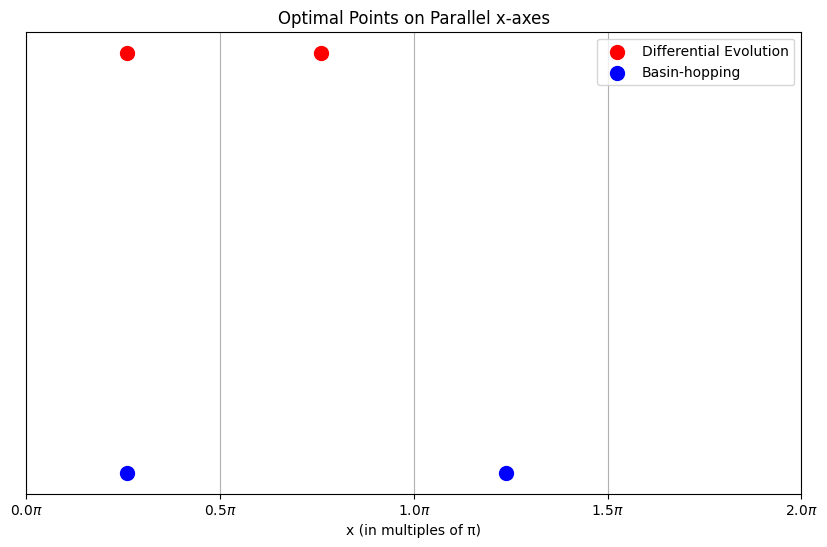

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# 运行你的优化代码后得到以下变量：
optimal_x_mu_de = result_de.x % (2 * np.pi)  # 将结果限制在0到2π之间
optimal_x_mu_bh = result_bh.x % (2 * np.pi)  # 将结果限制在0到2π之间

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 设置偏移量，以便不同方法的点不重合
offset_de = 0.1  # 差分进化方法的偏移
offset_bh = -0.1  # 盆地跳跃方法的偏移

# 将最优点画在不同的x轴上，使用pi为刻度显示
plt.scatter(optimal_x_mu_de / np.pi, np.zeros_like(optimal_x_mu_de) + offset_de, color='red', label='Differential Evolution', s=100)
plt.scatter(optimal_x_mu_bh / np.pi, np.zeros_like(optimal_x_mu_bh) + offset_bh, color='blue', label='Basin-hopping', s=100)

# 设置x轴刻度为pi的倍数
plt.xticks(ticks=np.arange(0, 2.5, 0.5), labels=[f'{i}$\pi$' for i in np.arange(0, 2.5, 0.5)])

# 设置y轴刻度为空，因为我们只关心x轴上的位置
plt.yticks([])

# 添加网格、标签和标题
plt.grid(True)
plt.xlabel('x (in multiples of π)')
plt.title('Optimal Points on Parallel x-axes')
plt.legend()

# 显示图形
plt.show()


5.5
Optimal x_mu: [0.49853201 2.0850002  2.78977866 1.39695866]
Minimal var: 4.5618057990736975
Optimal x_mu: [0.49853253 1.39696008 2.78977805 2.08500024]
Minimal var: 4.5618043192337705


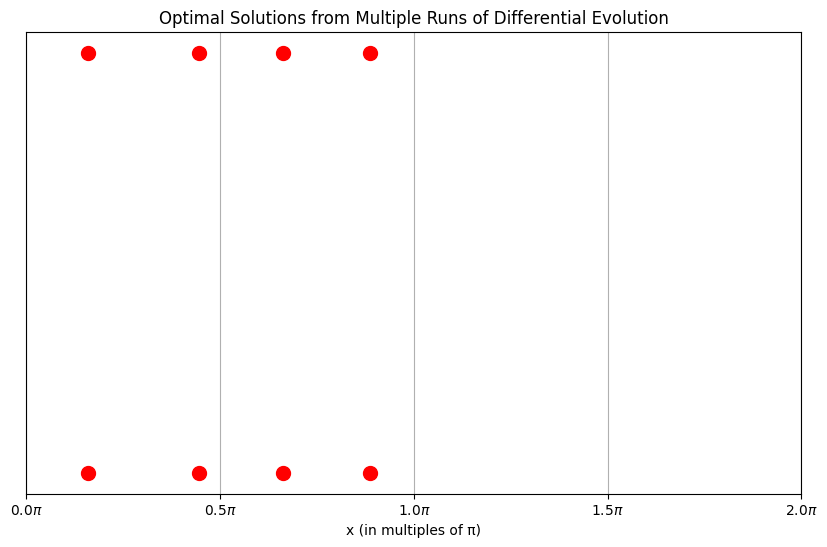

Unique optimal x_mu values (in multiples of π):
0.15869π (0.49854 radians)
0.44467π (1.39697 radians)
0.66368π (2.08501 radians)
0.88801π (2.78977 radians)


In [64]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

# Define r
r = 4
print((2*r**2+1)/6)

# Initialize p0
d = 1
p0 = np.array([mu**d for mu in range(1, r + 1)])

# Define the function to calculate var based on x_mu
def calculate_var(x_mu, reg_param=1e-5):
    # Create matrix A based on x_mu
    A = np.array([[np.sin(n * x) for n in range(1, r + 1)] for x in x_mu])
    
    # Add a small regularization term to the diagonal of A
    A += reg_param * np.eye(r)
    
    # Calculate the inverse of A and the dot product with p0
    try:
        dot_product_result = np.dot(np.linalg.inv(A).T, p0)
        var = 0.5 * np.sum(dot_product_result**2)
    except np.linalg.LinAlgError:
        # In case A is singular, return a large number
        var = np.inf
    return var

# Define the bounds for x_mu (0 to 2π for each element)
bounds = [(0, np.pi) for _ in range(r)]

# Run multiple optimizations with different initial guesses
n_trials = 2  # Number of different initial solutions
all_optimal_x_mu = []

# # Define the analytical gradient computation
def analytical_gradient1(x):
    r = len(x)
    A = np.array([[np.sin(k * x[i]) for k in range(1, r+1)] for i in range(r)])
    A_1 = np.array([[k * np.cos(k * x[i]) for k in range(1, r+1)] for i in range(r)])
    A_t_A_inv = np.linalg.inv(A.T @ A)
    D = A_1 @ A_t_A_inv @ np.outer(p0, p0) @ np.linalg.inv(A)
    
    grad = - np.diag(D)
    return grad

def analytical_gradient2(x):
    r = len(x)
    
    # 计算矩阵 A
    A = np.array([[np.sin(k * x[i]) for k in range(1, r+1)] for i in range(r)])
    print("Matrix A:\n", A)
    
    # 计算矩阵 A_1
    A_1 = np.array([[k * np.cos(k * x[i]) for k in range(1, r+1)] for i in range(r)])
    print("Matrix A_1:\n", A_1)
    
    # 计算 A^{-1}
    A_inv = np.linalg.inv(A)
    print("Matrix A_inv (A^{-1}):\n", A_inv)
    
    # 计算 A_1 * A^{-1}
    A1_Ainv = A_1 @ A_inv
    print("Matrix A_1 * A^{-1}:\n", A1_Ainv)
    
    # 计算 b
    b = A_inv.T @ p0
    print("Vector b (A_inv.T * p0):\n", b)
    
    # 计算 b * b^T
    bb_T = np.outer(b, b)
    print("Matrix b * b^T:\n", bb_T)
    
    # 计算 A.T @ A
    A_t_A = A.T @ A
    print("Matrix A.T @ A:\n", A_t_A)
    
    # 计算 (A.T @ A) 的逆矩阵
    A_t_A_inv = np.linalg.inv(A_t_A)
    print("Matrix A_t_A_inv:\n", A_t_A_inv)
    
    # 计算 D 矩阵
    D = A_1 @ A_t_A_inv @ np.outer(p0, p0) @ np.linalg.inv(A)
    print("Matrix D:\n", D)
    
    # 计算梯度
    grad = - np.diag(D)
    print("Gradient:\n", grad)
    
    return grad

for i in range(n_trials):
    # 增加迭代次数和更小的容差
    max_iter = 3000
    tolerance = 1e-18

    # Differential Evolution
    result_de = differential_evolution(calculate_var, bounds, maxiter=max_iter, tol=tolerance)

    # x_mu_initial = np.random.uniform(0, np.pi, r)
    # result_de = basinhopping(calculate_var, x_mu_initial, niter=100)
    optimal_x_mu_de = result_de.x
    # print("norm of radient at optimal x_mu:", np.linalg.norm(analytical_gradient2(optimal_x_mu_de)))
    print("Optimal x_mu:", optimal_x_mu_de)
    print("Minimal var:", result_de.fun)
    all_optimal_x_mu.append(optimal_x_mu_de)

# Plotting the results
plt.figure(figsize=(10, 6))

for i, optimal_x_mu_de in enumerate(all_optimal_x_mu):
    plt.scatter(optimal_x_mu_de / np.pi, np.zeros_like(optimal_x_mu_de) + i, color='red', s=100, label='Optimal x_mu' if i == 0 else "")

# Set x-axis ticks to multiples of pi
plt.xticks(ticks=np.arange(0, 2.5, 0.5), labels=[f'{i}$\pi$' for i in np.arange(0, 2.5, 0.5)])

# Set y-axis ticks to empty since we only care about the x-axis positions
plt.yticks([])

# Add grid, labels, and title
plt.grid(True)
plt.xlabel('x (in multiples of π)')
plt.title('Optimal Solutions from Multiple Runs of Differential Evolution')

# Show the plot
plt.show()

# Convert to numpy array for easier processing
all_optimal_x_mu = np.array(all_optimal_x_mu)

# Consider numbers close enough to be the same by rounding
tolerance = 1e-5  # Set an appropriate tolerance for uniqueness
unique_x_mu = np.unique(np.round(all_optimal_x_mu / np.pi, decimals=int(-np.log10(tolerance)))) * np.pi
unique_x_mu = np.sort(unique_x_mu)

# Print the unique elements
print("Unique optimal x_mu values (in multiples of π):")
for val in unique_x_mu:
    print(f"{val/np.pi:.5f}π ({val:.5f} radians)")

In [79]:
# 原始数组
arr = np.array([0.49853253, 1.39696008, 2.78977805, 2.08500024])

# 排序
sorted_arr = np.sort(arr)

# 打印相邻两个元素
for i in range(len(sorted_arr) - 1):
    print(f"{sorted_arr[i]-sorted_arr[i + 1]}")

-0.89842755
-0.6880401599999999
-0.70477781


In [85]:
np.pi/(r+np.sqrt(0.5))

0.6674147835664509

In [67]:
Omegas=np.arange(1, r + 1)
def analytical_gradient(x, Omegas):
    p = Omegas ** d * (-1 if d % 4 == 3 else 1)
    A = np.sin(np.outer(x, Omegas))
    A_1 = np.cos(np.outer(x, Omegas)) * Omegas
    A_inv = np.linalg.inv(A)
    b = np.linalg.inv(A.T) @ p
    grad = -np.diag(A_1 @ A_inv @ np.outer(b, b))
    return grad

optimal_grad = analytical_gradient(optimal_x_mu_de, Omegas)
print(optimal_grad)
print(np.linalg.norm(optimal_grad))

[-5.06274689e-05  6.03378482e-06 -1.55219199e-05  1.07217231e-06]
5.330691058841131e-05


In [68]:
x= np.array([0.15869*np.pi, 
             (0.44467)*np.pi, 
             (0.44467+0.219)*np.pi,
             (0.44467+0.219*2)*np.pi])

optimal_grad = analytical_gradient(x, Omegas)
print(optimal_grad)
print(np.linalg.norm(optimal_grad))

[-4.25793033e-04 -8.96337746e-05 -1.05062990e-02 -8.50315602e-02]
0.08567927334966084


In [69]:
0.90859-0.72571

0.18288000000000004

In [70]:
0.72571-0.54244

0.18326999999999993

In [71]:
0.54244-0.36361

0.17883000000000004

In [72]:
optimal_x_mu_de

array([0.49853253, 1.39696008, 2.78977805, 2.08500024])

In [73]:
0.91172+5.37146

6.28318

In [74]:
# calculate_var([0.64393,1.79825,3.59668], reg_param=1e-5)

In [75]:
unique_x_mu

array([0.49853934, 1.39697201, 2.08501221, 2.78976569])

In [76]:
# Given index sets
index_sets = [
    (1, 2, 3),
    (1, 3, 2),
    (3, 1, 2),
    (3, 2, 1),
    # (1, 2, 4),
    # (1, 3, 5),
    # (1, 4, 5),
    # (2, 3, 6),
    # (2, 4, 6),
    # (3, 5, 6),
    # (4, 5, 6)
]

index_sets = [
    # (1, 3),
    (1, 2),
    # (2, 4),
    # (3, 4)
]

# Store the first result for comparison
first_var_value = None
are_all_equal = True

# Iterate through each index set, extract elements from unique_x_mu, and compute the var
for i, indices in enumerate(index_sets):
    x_mu = unique_x_mu[np.array(indices) - 1]  # Convert 1-based to 0-based index
    var_value = calculate_var(x_mu)


    A = np.array([[np.sin(n * x) for n in range(1, r + 1)] for x in x_mu])
    ATA = A.T @ A
    dot_product_result = np.dot(np.linalg.inv(A).T, p0)
    var = 0.5 * np.sum(dot_product_result**2)
    print(A)
    print(ATA)
    print(dot_product_result)
    print(var)


    # On first iteration, store the var value to compare with subsequent results
    if i == 0:
        first_var_value = var_value
    else:
        # Compare with the first var value
        if not np.isclose(var_value, first_var_value, atol=1e-4):
            are_all_equal = False
    
    print(f"Index set {indices}: x_mu = {x_mu}, calculate_var = {var_value}")

# Print the final result of the comparison
if are_all_equal:
    print("All calculate_var results are equal.")
else:
    print("Not all calculate_var results are equal.")

ValueError: operands could not be broadcast together with shapes (2,4) (4,4) (2,4) 

In [13]:
import numpy as np
x_mu = [2.52609182,5.3714637]
A = np.array([[np.sin(n * x) for n in range(1, r + 1)] for x in x_mu])
M = np.linalg.inv(A.T @ A)

def compute_matrix(x):
    sin_x = np.sin(x)
    cos_x = np.cos(x)
    sin_2x = np.sin(2 * x)
    cos_2x = np.cos(2 * x)
    
    matrix = np.array([
        [2 * sin_x * cos_x, cos_x * sin_2x + 2 * cos_2x * sin_x],
        [cos_x * sin_2x + 2 * cos_2x * sin_x, 4 * sin_2x * cos_2x]
    ])
    print(M @ matrix @ M )
    return np.sum((M @ matrix @ M ) * (np.outer(p0,p0)))

print(compute_matrix(x_mu[0]))
print(compute_matrix(x_mu[1]))

[[-1.42979737  0.94116018]
 [ 0.94116018 -0.58371786]]
-2.805700829489055e-05
[[-1.04421671 -0.05867559]
 [-0.05867559  0.31972926]]
-2.019329357283439e-06


In [14]:
x = [3.75710181,5.37146315]
x1=x[0]
x2=x[1]

# Compute the components
denominator = np.sin(x1) * np.sin(2 * x2) - np.sin(x2) * np.sin(2 * x1)
vector = np.array([np.sin(2 * x2) - 2 * np.sin(x2),
                   2 * np.sin(x1) - np.sin(2 * x1)])

# Compute the final result
result = (1 / denominator) * vector
result

array([ 0.46984193, -1.60806948])

In [15]:
0.5*np.sum(result**2)

1.4033194536790972

In [16]:
# Compute the components of the expression
term1 = (np.cos(x2) - 1)**2 / (np.sin(x1)**2 * (np.cos(x1) - np.cos(x2))**2)
term2 = (np.cos(x1) - 1)**2 / (np.sin(x2)**2 * (np.cos(x1) - np.cos(x2))**2)

# Compute the final result
result = 0.5 * (term1 + term2)
result

1.4033194536790967

In [17]:
# Compute the first expression
expression1 = (
    (np.cos(x2) - 1)**2 * np.sin(x2)**2 * (np.cos(x1) * np.cos(x2) - np.cos(2 * x1))
    + np.sin(x1)**4 * (np.cos(x1) - 1) * (np.cos(x2) - 1)
)

# Compute the second expression
expression2 = (
    (np.cos(x1) - 1)**2 * np.sin(x1)**2 * (np.cos(x1) * np.cos(x2) - np.cos(2 * x2))
    + np.sin(x2)**4 * (np.cos(x1) - 1) * (np.cos(x2) - 1)
)

np.sin(x1),np.sin(x2)


(-0.5773743129181707, -0.7905595350515964)